**Grammar-based text mining**

In [1]:
import pandas as pd

sentences
I like to eat donuts
America won 2 to 0 vs Chivas
Pizza is the best
Tigres has the best goalie
I would prefer a salad
This was the best game of the season

**Categories For Classification**
* Access Request  
* Splunk Request
* New type of request
* Customer Requests
* Internal tickets
* Tickets from Monitoring request
* COO project: Apollo, E2A, logging RFP, Dynatrace migration


In [77]:
#file_name = 'sample_data/dataset1and2.csv'
file_name  = '../../Software/class_inicial.csv'
jira_df = pd.read_csv (file_name)
print(jira_df)

                                          sentences
0                              I like to eat donuts
1                      America won 2 to 0 vs Chivas
2                                 Pizza is the best
3                        Tigres has the best goalie
4                            I would prefer a salad
5              This was the best game of the season
6  Enterprise Monitoring Request - Test user update


* I like to eat donuts
* 1.- keywords
* eat
* donuts
* like
* 2.- annotations
* 3.- grammar



* eat,food_verb
* donuts,food
* like,verb

In [78]:
type(jira_df)

pandas.core.frame.DataFrame

In [20]:
jira_df.columns

Index(['sentences'], dtype='object')

In [5]:
jira_df.head()

,sentences
0,I like to eat donuts
1,America won 2 to 0 vs Chivas
2,Pizza is the best
3,Tigres has the best goalie
4,I would prefer a salad


In [ ]:
jira_df.tail(2)

,sentences
4,I would prefer a salad
5,This was the best game of the season


In [79]:
jira_sel = jira_df[["sentences"]]

In [62]:
#jira_sel = jira_df[["Summary"]]

In [80]:
sentences = jira_sel["sentences"]

In [63]:
#summaries = jira_sel["Summary"]

In [81]:
sentences

0                                I like to eat donuts
1                        America won 2 to 0 vs Chivas
2                                   Pizza is the best
3                          Tigres has the best goalie
4                              I would prefer a salad
5                This was the best game of the season
6    Enterprise Monitoring Request - Test user update
Name: sentences, dtype: object

In [25]:
desc1 = sentences[2]

In [82]:
desc1 = sentences[6]

In [83]:
desc1

'Enterprise Monitoring Request - Test user update'

In [6]:
pip install svgling

Note: you may need to restart the kernel to use updated packages.


In [101]:
import csv, sys
from collections import defaultdict
classlookup = None
#filename = 'sample_data/summary_dictionary.csv'
filename = '../../Software/dictionary_1.csv'
with open(filename, newline='') as f:
                reader = csv.reader(f)
                try:
                    classlookup = defaultdict(list)
                    for key, val in reader:
                        classlookup[key] = val
                except csv.Error as e:
                    sys.exit('file {}, line {}: {}'.format(filename, reader.line_num, e))

In [89]:
classlookup["monitor"]

'MONITOR'

In [102]:
vocabulary = list(classlookup.keys())

In [103]:
vocabulary

['enterpris', 'monitor', 'request', 'test', 'user', 'updat']

In [104]:
desc1

'Enterprise Monitoring Request - Test user update'

In [105]:
def determineClass(tuple, vocabulary, lexicon):
## compare unigrams to candidates
   if tuple[0] in vocabulary:
      return lexicon[tuple[0]]
   else:
      print('not found')
      return ('NF')  ## same tag as before

In [92]:
# To Download the NLTK library individually
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [106]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import FreqDist
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')    # Use nltk downloader to download resource "maxent_ne_chunker"
nltk.download('words')

stemmer = PorterStemmer()

from nltk.stem import WordNetLemmatizer
words = word_tokenize(desc1)

print(words)

['Enterprise', 'Monitoring', 'Request', '-', 'Test', 'user', 'update']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\palmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\palmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\palmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\palmi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\palmi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\palmi\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-

In [94]:
type(words)

list

In [107]:
lemmatized_output_3 = [stemmer.stem(w) for w in words]

print(lemmatized_output_3)
# pos part of speech
tag = nltk.pos_tag(lemmatized_output_3)
print(tag)

taggedentry = [list(i) for i in tag]

['enterpris', 'monitor', 'request', '-', 'test', 'user', 'updat']
[('enterpris', 'RB'), ('monitor', 'NN'), ('request', 'NN'), ('-', ':'), ('test', 'NN'), ('user', 'NN'), ('updat', 'NN')]


In [108]:
taggedentry

[['enterpris', 'RB'],
 ['monitor', 'NN'],
 ['request', 'NN'],
 ['-', ':'],
 ['test', 'NN'],
 ['user', 'NN'],
 ['updat', 'NN']]

In [109]:
determineClass(taggedentry[1],vocabulary,classlookup)

'MONITOR'

In [110]:
i = 0
for entrypair in taggedentry:
    result = determineClass(entrypair, vocabulary, classlookup)
    print(result)
    if result != 'NF':
        entrypair[1] = result.upper()
    i=i+1

taggedentry = tuple(tuple(i) for i in taggedentry)

ORG
MONITOR
REQUEST
not found
NF
TEST
USER
UPDATE


In [111]:
taggedentry

(('enterpris', 'ORG'),
 ('monitor', 'MONITOR'),
 ('request', 'REQUEST'),
 ('-', ':'),
 ('test', 'TEST'),
 ('user', 'USER'),
 ('updat', 'UPDATE'))

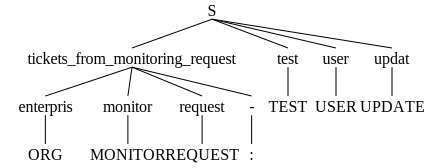

In [112]:
import svgling
# Create chunk parser object

jira_grammar = r"""
       tickets_from_monitoring_request: {<ORG><MONITOR><REQUEST><.*>}
       tickets_from_monitoring_request: {<ORG><MONITOR><REQUEST>}
       
                                        
       splunk_request: {<SPLUNK_REQUEST><JJ><SPLUNK_REQUEST>}
       monitoring: {<monitoring><.*>?}
       customer_request  : {<CUSTOMER_REQUEST>+<.*>*<ENVIRONMENT>}
                           {<CUSTOMER_REQUEST>$}
                           {<TOOL><.*>*<MODIFIER><SERVICE>}
       operational_task  : {<ACTION><.*>+}
       test  : {<customer_request>+<.*>{3,}}
"""

chunk_parser = nltk.RegexpParser(jira_grammar)


# Create a tree diagram for the chunking
tree = chunk_parser.parse(taggedentry)
display(tree)

In [ ]:
import svgling


In [113]:
taggedentry

(('enterpris', 'ORG'),
 ('monitor', 'MONITOR'),
 ('request', 'REQUEST'),
 ('-', ':'),
 ('test', 'TEST'),
 ('user', 'USER'),
 ('updat', 'UPDATE'))

In [ ]:
(('i', 'NNS'),
 ('like', 'VERB'),
 ('to', 'TO'),
 ('eat', 'FOOD_VERB'),
 ('donut', 'FOOD'))

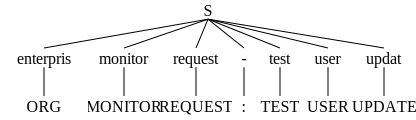

In [114]:
# Create chunk parser object

food_sport_grammar = r"""
      food: {<FOOD_VERB><FOOD>}
            {^<FOOD>}

"""

chunk_parser = nltk.RegexpParser(food_sport_grammar)


# Create a tree diagram for the chunking
tree = chunk_parser.parse(taggedentry)
display(tree)

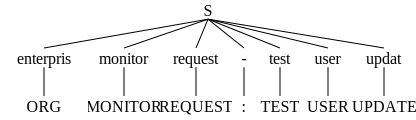

In [115]:
tree

In [116]:
type(tree)

nltk.tree.tree.Tree

In [117]:
print(tree)

(S
  enterpris/ORG
  monitor/MONITOR
  request/REQUEST
  -/:
  test/TEST
  user/USER
  updat/UPDATE)


In [118]:
def traverse_tree(tree):
    print("tree:", tree)
    for subtree in tree:
        if type(subtree) == nltk.tree.Tree:
            traverse_tree(subtree)


In [119]:
traverse_tree(tree)

tree: (S
  enterpris/ORG
  monitor/MONITOR
  request/REQUEST
  -/:
  test/TEST
  user/USER
  updat/UPDATE)


In [120]:
tree.pretty_print()

                                               S                                  
       ________________________________________|___________________________        
enterpris/ORG monitor/MONITOR request/REQUEST -/: test/TEST user/USER updat/UPDATE



In [121]:
test = tree[0,1]

TypeError: tuple indices must be integers or slices, not tuple

In [122]:
i = 0
classifications = defaultdict(list)
for s in tree.subtrees(lambda t: t.height() == 2):
  print(s)
  print(type(s))
  classifications[i] = str(s)
  i=i+1

(S
  enterpris/ORG
  monitor/MONITOR
  request/REQUEST
  -/:
  test/TEST
  user/USER
  updat/UPDATE)
<class 'nltk.tree.tree.Tree'>


In [123]:
classifications

defaultdict(list,
            {0: '(S\n  enterpris/ORG\n  monitor/MONITOR\n  request/REQUEST\n  -/:\n  test/TEST\n  user/USER\n  updat/UPDATE)'})

In [124]:
type(classifications)

collections.defaultdict

In [125]:
for k,v in classifications.items():               # will become d.items() in py3k
  print("%s - %s" % (str(k), str(v)))
  classification = v
  print(v)

0 - (S
  enterpris/ORG
  monitor/MONITOR
  request/REQUEST
  -/:
  test/TEST
  user/USER
  updat/UPDATE)
(S
  enterpris/ORG
  monitor/MONITOR
  request/REQUEST
  -/:
  test/TEST
  user/USER
  updat/UPDATE)


In [126]:
classification

'(S\n  enterpris/ORG\n  monitor/MONITOR\n  request/REQUEST\n  -/:\n  test/TEST\n  user/USER\n  updat/UPDATE)'

In [127]:
import re
res = re.findall(r'\(\w+', classification)

In [128]:
res

['(S']

In [129]:
type(res)

list

In [130]:
category_label = res[0][1:]

In [131]:
category_label

'S'

In [132]:
str(tree)

'(S\n  enterpris/ORG\n  monitor/MONITOR\n  request/REQUEST\n  -/:\n  test/TEST\n  user/USER\n  updat/UPDATE)'

In [133]:
tree.subtrees

<bound method Tree.subtrees of Tree('S', [('enterpris', 'ORG'), ('monitor', 'MONITOR'), ('request', 'REQUEST'), ('-', ':'), ('test', 'TEST'), ('user', 'USER'), ('updat', 'UPDATE')])>

In [ ]:
END